In [22]:
from sklearn.datasets import load_iris
from sklearn import tree
import sys
import os   
os.environ["PATH"]+=os.pathsep+'/usr/lib/graphviz'


In [23]:
iris=load_iris()
clf=tree.DecisionTreeClassifier()
clf=clf.fit(iris.data,iris.target)
with open("./mlpractice/images/iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)


In [24]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("./mlpractice/images/iris.pdf")

True

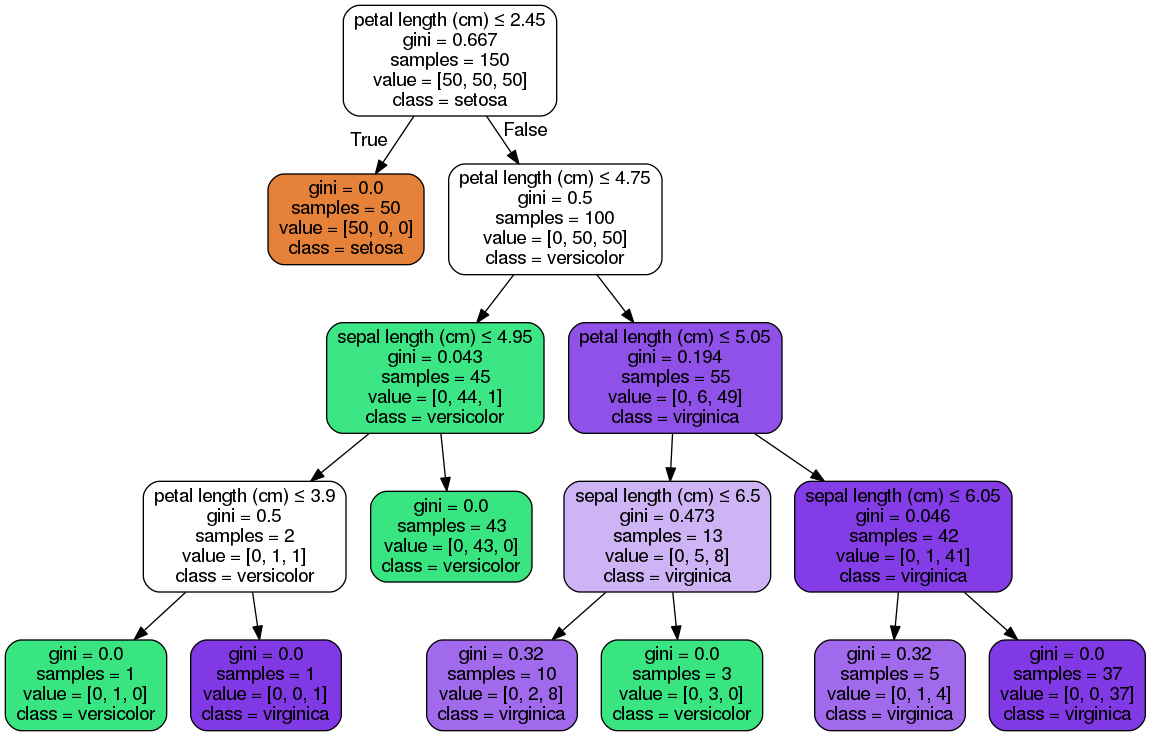

In [29]:
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None, 
                         # feature_names=iris.feature_names,
                         feature_names=[iris.feature_names[0],iris.feature_names[2]],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True, 
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

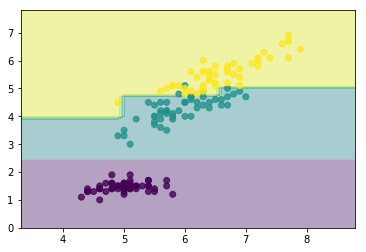

In [26]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier



# 仍然使用自带的iris数据
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(X, y)


# 画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

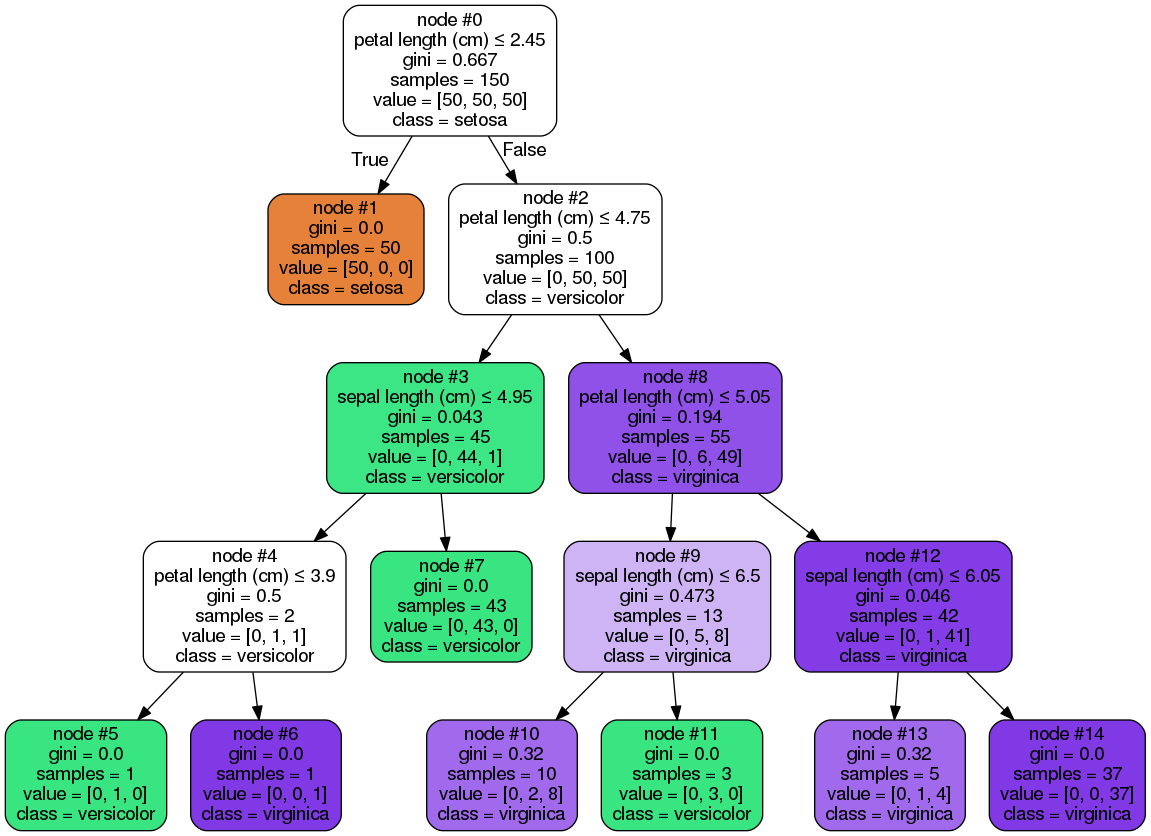

In [27]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=[iris.feature_names[0],iris.feature_names[2]],  
                         class_names=iris.target_names, 
                         filled=True, rounded=True,
                         special_characters=True,
                                node_ids = True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

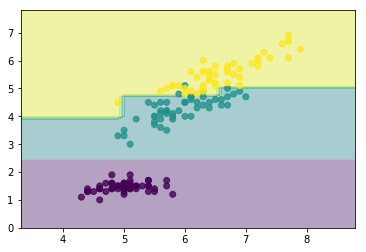